<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

// needed to generate the Table of contents 
// taken from github.com/kmahelona/ipython_notebook_goodies

<IPython.core.display.Javascript object>

# Modeling
Importing modules and data from prevoius step


In [186]:
## Fit Models with Training Data Set
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fast')

import seaborn as sns

In [187]:
from timeit import default_timer as timer
from datetime import datetime
from tqdm.auto import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [4]:
#Load data and scaler model

X_train_scaled = pd.read_csv("../data/X_train_scaled.csv").to_numpy()
y_train = pd.read_csv("../data/y_train.csv").to_numpy().ravel()
X_train_over_scaled = pd.read_csv("../data/X_train_over_scaled.csv").to_numpy()
y_train_over = pd.read_csv("../data/y_train_over.csv").to_numpy().ravel()
X_test_scaled = pd.read_csv("../data/X_test_scaled.csv").to_numpy()
y_test = pd.read_csv("../data/y_test.csv").to_numpy().ravel()
feature_list = pd.read_csv("../data/feature_list.csv")
feature_list = pd.Index(list(feature_list["0"]))

scaler = joblib.load("../data/scaler.pkl")

In [5]:
train_df = pd.DataFrame(X_train_scaled, columns = feature_list)
train_df.head()

,cycle_time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.00000,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662
1,0.00277,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014
2,0.00554,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375
3,0.00831,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386
4,0.01108,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502


In [6]:
train_over_df = pd.DataFrame(X_train_over_scaled, columns = feature_list)
train_over_df.head()

,cycle_time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.576177,0.933735,0.596032,0.808913,0.294686,0.666667,0.019923,0.821429,0.249467,0.558824,0.025183,0.874952,0.750000,0.232558,0.255316
1,0.531856,0.647590,0.526924,0.633187,0.439614,0.378788,0.422911,0.517857,0.520256,0.235294,0.463980,0.529434,0.583333,0.465116,0.352665
2,0.792244,0.524096,0.629387,0.910702,0.322061,0.560606,0.126447,0.785714,0.219616,0.661765,0.093044,0.825702,0.583333,0.387597,0.320077
3,0.448753,0.704819,0.373011,0.614619,0.520129,0.363636,0.314502,0.511905,0.494670,0.338235,0.322531,0.443247,0.583333,0.403101,0.488401
4,0.554017,0.665663,0.751908,0.854828,0.285024,0.303030,0.521583,0.678571,0.336887,0.411765,0.568170,0.642940,0.750000,0.240310,0.159348


In [7]:
test_df = pd.DataFrame(X_test_scaled, columns = feature_list)
test_df.head()

,cycle_time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.00000,0.545181,0.310661,0.269413,0.652174,0.212121,0.127614,0.208333,0.646055,0.220588,0.132160,0.308965,0.333333,0.558140,0.661834
1,0.00277,0.150602,0.379551,0.222316,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0.682171,0.686827
2,0.00554,0.376506,0.346632,0.322248,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0.728682,0.721348
3,0.00831,0.370482,0.285154,0.408001,0.679549,0.196970,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0.666667,0.662110
4,0.01108,0.391566,0.352082,0.332039,0.694042,0.166667,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0.658915,0.716377


## Fit Models with Training Data Set

Let's build some useful functions

In [107]:
def my_cost_function(y_test, y_pred):
    cost_matrix = [[0,1,1],[1,0,1],[20,10,0]]
    conf_matrix = confusion_matrix(y_test, y_pred)
    loss = -np.sum(conf_matrix*cost_matrix)
    return loss

my_score = make_scorer(my_cost_function, greater_is_better=False)

In [108]:
def try_model(model, X_train, y_train, X_test, y_test):
    """ Fits a model on the selected data with the default parameters 
    ex. usage 
        summary = try_model(KNeighborsClassifier(),X_train, y_train)"""
    # statements
    print('Trying Model :'+ str(model))
    start = timer()
    model.fit(X_train, y_train)
    middle = timer()
    test_score = model.score(X_test, y_test)
    end = timer()
    train_score = model.score(X_train, y_train) 
    
    
    #my_test_score = cross_val_score(model, X_test, y_test, cv=5, scoring=my_score)
    #print("|  Mean Cost: %0.2f (+/- %0.2f)" % (my_test_score.mean(), my_test_score.std() * 2))
    
    # calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cost = my_cost_function(y_test, y_pred)
    
    print('|  Train Score: ' + str(round(train_score,3)))
    print('|  Test Score: ' + str(round(test_score,3)))
    
    train_elapsed = round(middle - start,3)
    test_elapsed = round(end - middle,3)

    summary = {'model_name': str(model),
               'training time [s]': train_elapsed,
               'test time [s]': test_elapsed,
               'test accuracy': test_score,
               'cost':cost,
               'train accuracy': train_score,
              'confusion matrix': cm,
              'trained_model':model}
    #print(summary)
    
    return summary

In [244]:
def plot_multiclass_confusion_matrix(y_test, y_pred, categories):
    """Plots the confusion matrix given the data and the lables."""
    
    cm = confusion_matrix(y_test, y_pred)
    #print(cm)
    
    group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    stats_text = "\n\nAccuracy={:0.2f}%".format(100*np.trace(cm) / float(np.sum(cm)))
    
    box_labels = [f"{v2}{v3}".strip() for v2, v3 in zip(group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    fig = plt.figure(figsize=(6,6))
    sns.set(font_scale=1.4)
    ax = sns.heatmap(cm, annot=box_labels, fmt='', cmap='Reds', xticklabels=categories, yticklabels=categories)
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    ax.set_title(stats_text)
    
    return fig, ax
 

In [258]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores")
    ax.set_xlabel(name_param_1)
    ax.set_ylabel('CV Average Score')
    ax.legend(loc="best")
    ax.grid('on')



In [110]:
models_summary = pd.DataFrame()
models_summary_over = pd.DataFrame()



### Dummy Classifier


In [111]:
strategies = ['most_frequent', 'stratified', 'prior', 'uniform']

for s in tqdm(strategies) :
    res = try_model(DummyClassifier(strategy=s), X_train_scaled, y_train, X_test_scaled, y_test)
    models_summary = models_summary.append(res, ignore_index=True)
    res_over = try_model(DummyClassifier(strategy=s), X_train_over_scaled, y_train_over, X_test_scaled, y_test)
    models_summary_over = models_summary_over.append(res_over, ignore_index=True)


Trying Model :DummyClassifier(strategy='most_frequent')
|  Train Score: 0.515
|  Test Score: 0.761
Trying Model :DummyClassifier(strategy='most_frequent')
|  Train Score: 0.333
|  Test Score: 0.065
Trying Model :DummyClassifier(strategy='stratified')
|  Train Score: 0.388
|  Test Score: 0.454
Trying Model :DummyClassifier(strategy='stratified')
|  Train Score: 0.33
|  Test Score: 0.339
Trying Model :DummyClassifier(strategy='prior')
|  Train Score: 0.515
|  Test Score: 0.761
Trying Model :DummyClassifier(strategy='prior')
|  Train Score: 0.333
|  Test Score: 0.065
Trying Model :DummyClassifier(strategy='uniform')
|  Train Score: 0.336
|  Test Score: 0.334
Trying Model :DummyClassifier(strategy='uniform')
|  Train Score: 0.338
|  Test Score: 0.34



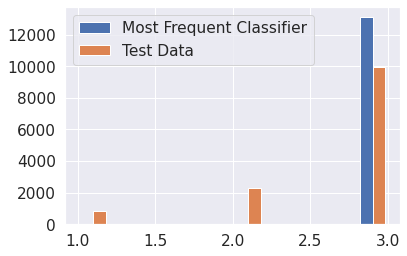

In [112]:
clf_dummy = DummyClassifier(strategy='most_frequent').fit(X_train_scaled, y_train)
y_dummy = clf_dummy.predict(X_test_scaled)
plt.hist([y_dummy, y_test])
plt.legend(['Most Frequent Classifier', 'Test Data'])

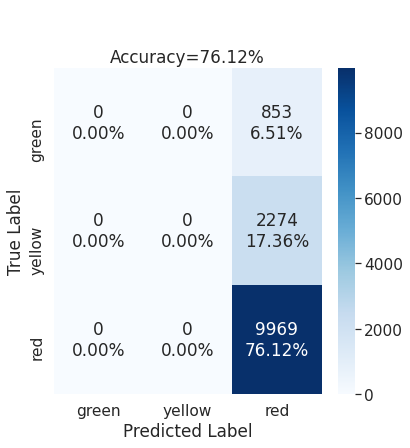

In [113]:
_ = plot_multiclass_confusion_matrix(y_test, clf_dummy.predict(X_test_scaled),['green','yellow','red'])


In [114]:
models_summary

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
0,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",-3127.0,DummyClassifier(strategy='most_frequent'),0.761225,0.001,0.515293,DummyClassifier(strategy='most_frequent'),0.002
1,"[[205, 195, 453], [571, 534, 1169], [2420, 249...",-75738.0,DummyClassifier(strategy='stratified'),0.454261,0.004,0.387524,DummyClassifier(strategy='stratified'),0.001
2,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",-3127.0,DummyClassifier(strategy='prior'),0.761225,0.001,0.515293,DummyClassifier(strategy='prior'),0.001
3,"[[262, 293, 298], [800, 725, 749], [3328, 3304...",-101740.0,DummyClassifier(strategy='uniform'),0.333537,0.001,0.336096,DummyClassifier(strategy='uniform'),0.001


In [115]:
models_summary_over

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
0,"[[853, 0, 0], [2274, 0, 0], [9969, 0, 0]]",-201654.0,DummyClassifier(strategy='most_frequent'),0.065134,0.001,0.333333,DummyClassifier(strategy='most_frequent'),0.002
1,"[[282, 293, 278], [768, 746, 760], [3223, 3373...",-100289.0,DummyClassifier(strategy='stratified'),0.339493,0.004,0.330229,DummyClassifier(strategy='stratified'),0.001
2,"[[853, 0, 0], [2274, 0, 0], [9969, 0, 0]]",-201654.0,DummyClassifier(strategy='prior'),0.065134,0.001,0.333333,DummyClassifier(strategy='prior'),0.001
3,"[[292, 299, 262], [711, 739, 824], [3259, 3337...",-100646.0,DummyClassifier(strategy='uniform'),0.340486,0.001,0.337911,DummyClassifier(strategy='uniform'),0.001


--> The Dummy Classifier: Most Frequent has 0.761 Accuracy!

In [116]:
models_summary_over['trained_model'][0].predict(X_test_scaled)

array([1, 1, 1, ..., 1, 1, 1])

### Test stock models (Default Parameters)
- KNeighborsClassifier
- SVC - Linear and RBF
- DecisionTreeClassifier
- RandomForestClassifier
- AdaBoostClassifier
- GradientBoostingClassifier




In [117]:
models_to_try = [KNeighborsClassifier(),
                 KNeighborsClassifier(n Sundays. If you can, please let me know what would be the best time for you and if you can't let me know, and I will find a3),
                 DecisionTreeClassifier(),
                 DecisionTreeClassifier(criterion='gini',max_depth=3),
                 RandomForestClassifier(),
                 RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
                 SVC(),
                 SVC(kernel="linear", C=0.025),
                 AdaBoostClassifier(),
                 GradientBoostingClassifier()
                ]
short_names = ['most_frequent', 'stratified', 'prior', 'uniform'] + ['KNN()',
                 'KNN(3)',
                 'Tree()',
                 'Tree(gini,d=3)',
                 'RandomForest()',
                 'RF(d=5, n=10, f=1)',
                 'SVC()',
                 'SVC("linear", C=0.025)',
                 'Ada()',
                 'Gradient()'
                ]

In [118]:
for m in tqdm(models_to_try) :
    res = try_model(m, X_train_scaled, y_train, X_test_scaled, y_test)
    models_summary = models_summary.append(res, ignore_index=True)
    res_over = try_model(m, X_train_over_scaled, y_train_over, X_test_scaled, y_test)
    models_summary_over = models_summary_over.append(res_over, ignore_index=True)
    


Trying Model :KNeighborsClassifier()
|  Train Score: 0.848
|  Test Score: 0.802
Trying Model :KNeighborsClassifier()
|  Train Score: 0.896
|  Test Score: 0.746
Trying Model :KNeighborsClassifier(n_neighbors=3)
|  Train Score: 0.875
|  Test Score: 0.79
Trying Model :KNeighborsClassifier(n_neighbors=3)
|  Train Score: 0.937
|  Test Score: 0.746
Trying Model :DecisionTreeClassifier()
|  Train Score: 1.0
|  Test Score: 0.764
Trying Model :DecisionTreeClassifier()
|  Train Score: 1.0
|  Test Score: 0.771
Trying Model :DecisionTreeClassifier(max_depth=3)
|  Train Score: 0.758
|  Test Score: 0.776
Trying Model :DecisionTreeClassifier(max_depth=3)
|  Train Score: 0.745
|  Test Score: 0.769
Trying Model :RandomForestClassifier()
|  Train Score: 1.0
|  Test Score: 0.832
Trying Model :RandomForestClassifier()
|  Train Score: 1.0
|  Test Score: 0.83
Trying Model :RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)
|  Train Score: 0.778
|  Test Score: 0.824
Trying Model :RandomFore

In [119]:
models_summary.sort_values(by=['test accuracy'], ascending=False)

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
10,"[[520, 294, 39], [88, 1224, 962], [10, 716, 92...",-8743.0,SVC(),0.838958,5.153,0.810043,SVC(),10.249
13,"[[576, 253, 24], [127, 1311, 836], [19, 886, 9...",-10480.0,GradientBoostingClassifier(),0.836210,0.043,0.831419,([DecisionTreeRegressor(criterion='friedman_ms...,17.907
12,"[[585, 227, 41], [210, 1050, 1014], [85, 598, ...",-9172.0,AdaBoostClassifier(),0.833919,0.142,0.782027,"(DecisionTreeClassifier(max_depth=1, random_st...",1.393
8,"[[548, 276, 29], [112, 1288, 874], [24, 882, 9...",-10591.0,RandomForestClassifier(),0.832239,0.190,1.000000,"(DecisionTreeClassifier(max_features='auto', r...",3.771
11,"[[519, 275, 59], [110, 947, 1217], [27, 589, 9...",-8091.0,"SVC(C=0.025, kernel='linear')",0.826130,2.347,0.781785,"SVC(C=0.025, kernel='linear')",6.609
9,"[[563, 184, 106], [161, 458, 1655], [45, 148, ...",-4486.0,"RandomForestClassifier(max_depth=5, max_featur...",0.824450,0.011,0.778392,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.083
4,"[[568, 239, 46], [235, 1116, 923], [112, 1040,...",-14083.0,KNeighborsClassifier(),0.801848,4.269,0.848093,KNeighborsClassifier(),0.049
5,"[[571, 234, 48], [293, 1040, 941], [191, 1043,...",-15766.0,KNeighborsClassifier(n_neighbors=3),0.790012,4.046,0.874509,KNeighborsClassifier(n_neighbors=3),0.049
7,"[[524, 310, 19], [179, 1410, 685], [50, 1694, ...",-19133.0,DecisionTreeClassifier(max_depth=3),0.775733,0.001,0.758422,DecisionTreeClassifier(max_depth=3),0.057
6,"[[540, 252, 61], [253, 1162, 859], [167, 1505,...",-19815.0,DecisionTreeClassifier(),0.763516,0.002,1.000000,DecisionTreeClassifier(),0.261


In [120]:
models_summary_over.sort_values(by=['test accuracy'], ascending=False)

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
8,"[[554, 274, 25], [118, 1394, 762], [23, 1026, ...",-11899.0,RandomForestClassifier(),0.829872,0.199,1.000000,"(DecisionTreeClassifier(max_features='auto', r...",5.311
12,"[[596, 242, 15], [220, 1409, 645], [70, 1271, ...",-15232.0,AdaBoostClassifier(),0.811927,0.124,0.763835,"(DecisionTreeClassifier(max_depth=1, random_st...",1.902
13,"[[580, 268, 5], [140, 1690, 444], [23, 1677, 8...",-18087.0,GradientBoostingClassifier(),0.804750,0.044,0.828771,([DecisionTreeRegressor(criterion='friedman_ms...,26.560
11,"[[530, 307, 16], [119, 1618, 537], [26, 1599, ...",-17489.0,"SVC(C=0.025, kernel='linear')",0.801161,4.246,0.774245,"SVC(C=0.025, kernel='linear')",16.340
9,"[[517, 318, 18], [139, 1323, 812], [30, 1296, ...",-14847.0,"RandomForestClassifier(max_depth=5, max_featur...",0.800473,0.011,0.759320,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.115
10,"[[527, 322, 4], [85, 1804, 385], [9, 1910, 8050]]",-20076.0,SVC(),0.792685,8.587,0.803154,SVC(),25.787
6,"[[528, 250, 75], [256, 1044, 974], [146, 1303,...",-17505.0,DecisionTreeClassifier(),0.770617,0.002,1.000000,DecisionTreeClassifier(),0.342
7,"[[526, 320, 7], [176, 1505, 593], [56, 1871, 8...",-20926.0,DecisionTreeClassifier(max_depth=3),0.769166,0.001,0.744615,DecisionTreeClassifier(max_depth=3),0.078
4,"[[562, 263, 28], [306, 1369, 599], [192, 1933,...",-24366.0,KNeighborsClassifier(),0.746411,5.834,0.896059,KNeighborsClassifier(),0.087
5,"[[544, 276, 33], [278, 1278, 718], [166, 1850,...",-23125.0,KNeighborsClassifier(n_neighbors=3),0.746411,5.780,0.936538,KNeighborsClassifier(n_neighbors=3),0.103


In [121]:
models_summary.sort_values(by=['cost'], ascending=False)

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
0,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",-3127.0,DummyClassifier(strategy='most_frequent'),0.761225,0.001,0.515293,DummyClassifier(strategy='most_frequent'),0.002
2,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",-3127.0,DummyClassifier(strategy='prior'),0.761225,0.001,0.515293,DummyClassifier(strategy='prior'),0.001
9,"[[563, 184, 106], [161, 458, 1655], [45, 148, ...",-4486.0,"RandomForestClassifier(max_depth=5, max_featur...",0.824450,0.011,0.778392,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.083
11,"[[519, 275, 59], [110, 947, 1217], [27, 589, 9...",-8091.0,"SVC(C=0.025, kernel='linear')",0.826130,2.347,0.781785,"SVC(C=0.025, kernel='linear')",6.609
10,"[[520, 294, 39], [88, 1224, 962], [10, 716, 92...",-8743.0,SVC(),0.838958,5.153,0.810043,SVC(),10.249
12,"[[585, 227, 41], [210, 1050, 1014], [85, 598, ...",-9172.0,AdaBoostClassifier(),0.833919,0.142,0.782027,"(DecisionTreeClassifier(max_depth=1, random_st...",1.393
13,"[[576, 253, 24], [127, 1311, 836], [19, 886, 9...",-10480.0,GradientBoostingClassifier(),0.836210,0.043,0.831419,([DecisionTreeRegressor(criterion='friedman_ms...,17.907
8,"[[548, 276, 29], [112, 1288, 874], [24, 882, 9...",-10591.0,RandomForestClassifier(),0.832239,0.190,1.000000,"(DecisionTreeClassifier(max_features='auto', r...",3.771
4,"[[568, 239, 46], [235, 1116, 923], [112, 1040,...",-14083.0,KNeighborsClassifier(),0.801848,4.269,0.848093,KNeighborsClassifier(),0.049
5,"[[571, 234, 48], [293, 1040, 941], [191, 1043,...",-15766.0,KNeighborsClassifier(n_neighbors=3),0.790012,4.046,0.874509,KNeighborsClassifier(n_neighbors=3),0.049


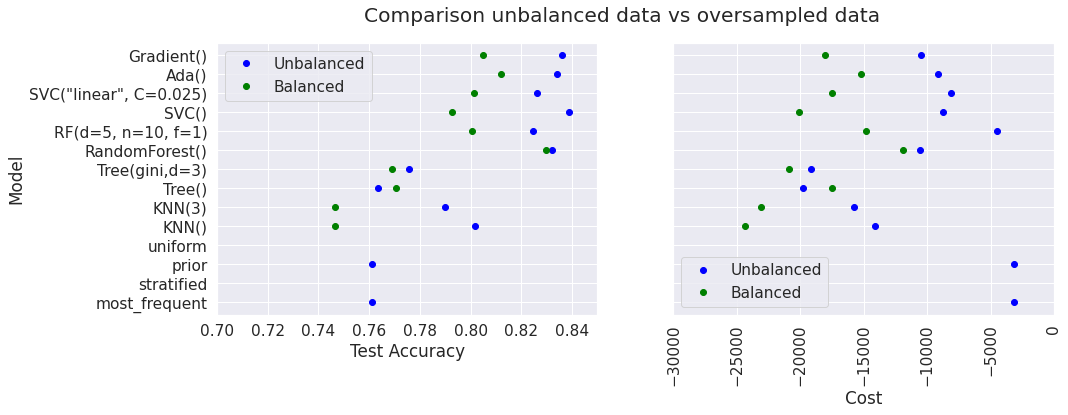

In [174]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.suptitle('Comparison unbalanced data vs oversampled data')

_ = ax[0].plot(models_summary['test accuracy'],models_summary['model_name'],'o',linestyle='None',color='blue')
_ = ax[0].plot(models_summary_over['test accuracy'],models_summary_over['model_name'],'o',linestyle='None',color='green')
_ = ax[0].legend(['Unbalanced', 'Balanced'])
labels = short_names
_ = ax[0].set_yticklabels(labels, rotation=0)
_ = ax[0].set_xlim([0.7,0.85])
#_ = ax[0].set_title('Test Accuracy')
_ = ax[0].set_xlabel('Test Accuracy')
_ = ax[0].set_ylabel('Model')

_ = ax[1].plot(models_summary['cost'],models_summary['model_name'],'o',linestyle='None',color='blue')
_ = ax[1].plot(models_summary_over['cost'],models_summary_over['model_name'],'o',linestyle='None',color='green')
_ = ax[1].legend(['Unbalanced', 'Balanced'])
labels = short_names
_ = ax[1].set_yticklabels(labels, rotation=0)
_ = plt.xticks(rotation=90)
_ = ax[1].set_xlim([-30000, 0])
#ax[1].set_title('Cost')
_ = ax[1].set_xlabel('Cost')
#ax[1].set_ylabel('Cost')

plt.savefig("../figures/Naive_model_comparison.png") 


In [ ]:
# print("Best Score:" + str(xgb_cv.best_score_))
# print("Best Parameters: " + str(xgb_cv.best_params_))

In [28]:
#plot confusion matrix for top accuracy and top costRegExr was created by gskinner.com, and is proudly hosted by Media Temple.

Edit the Expression & Text to see matches. Roll over matches or the expression for details. PCRE & JavaScript flavors of RegEx are supported. Validate your expression with Tests mode.

The side bar includes a Cheatsheet, full Reference, and Help. You can also Save & Share with the Community, and view patterns you create or favorite in My Patterns.

Explore results with the Tools below. Replace & List output custom results. Details lists capture groups. Explain describes your expression in plain English.
RegExr was created by gskinner.com, and is proudly hosted by Media Temple.

Edit the Expression & Text to see matches. Roll over matches or the expression for details. PCRE & JavaScript flavors of RegEx are supported. Validate your expression with Tests mode.

The side bar includes a Cheatsheet, full Reference, and Help. You can also Save & Share with the Community, and view patterns you create or favorite in My Patterns.

Explore results with the Tools below. Replace & List output custom results. Details lists capture groups. Explain describes your expression in plain English.


## Review Model Outcomes — Iterate over additional models as needed.
-> pick top 2  and run hyperparameters tuning

SVC('rbf')


RF()


### GridSearchCV

- SVC - linear / RBF (best accuracy)

- Random Forest (lowest cost)




In [212]:
 np.logspace(-2, 3,num=6)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [188]:
# model_grid = [{'C' : np.logspace(-2, 5,num=8),
#                'kernel': ['linear','rbf'],
#                'gamma' :  np.logspace(-2, 3,num=6)},
#               {'n_estimators':np.arange(50,201,50),
#                'criterion':['gini', 'entropy'],
#                'max_depth':np.arange(1,11,2)}]             
# models = [SVC(), RandomForestClassifier()]             

In [213]:
# model_grid = [{'C' : np.logspace(-2, 5,num=8),
#                'kernel': ['linear','rbf'],
#                'gamma' :  np.logspace(-2, 3,num=6)},]             
# models = [SVC()] 

In [250]:
model_grid = [{'C' : np.arange(1,100,100),
               'kernel': ['linear','rbf'],
               'gamma' : ['scale','auto']},
              {'n_estimators':np.arange(50,201,100),
               'criterion':['gini', 'entropy'],
               'max_depth':np.arange(1,11,10)}]             
models = [SVC(), RandomForestClassifier()]    

In [225]:
#quick for debugging
model_grid = [{'C' : np.arange(80,82,1),
               'kernel': ['rbf'],
               'gamma' : ['auto']},
              {'n_estimators':np.arange(49,51,1),
               'criterion':['entropy'],
               'max_depth':np.arange(6,8,1)}]             
models = [SVC(), RandomForestClassifier()]    

In [226]:
hyper_tuning = pd.DataFrame()

In [234]:
for model, param_grid in tqdm(zip(models, model_grid)):
    print("Training model : " + str(model))
    print("Start Time : "+ str(datetime.now()))
    grid_cv = GridSearchCV(model,param_grid, cv=3, refit=True)
    start = timer()
    grid_cv.fit(X_train_scaled,y_train)
    end = timer()
    test_score = grid_cv.score(X_test_scaled, y_test)
    y_pred = grid_cv.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    cost = my_cost_function(y_test, y_pred)
    print(str(round(end - start,3)) + ' seconds elapsed.')
    print("|----Best Score:" + str(grid_cv.best_score_))
    print("|----Best Parameters: " + str(grid_cv.best_params_))
    hyper_tuning = hyper_tuning.append({'Training model': model,
                        'grid_cv object': grid_cv,
                        'Time':round(end - start,3),
                        'Test Score':test_score,
                        'Cost':cost,
                        'Best Score':grid_cv.best_score_,
                        'Confusion Matrix':cm,
                        'Best Parameters': grid_cv.best_params_}, ignore_index=True)

Training model : SVC()
Start Time : 2020-10-06 15:23:40.600573
49.56 seconds elapsed.
|----Best Score:0.7905578983083709
|----Best Parameters: {'C': 80, 'gamma': 'auto', 'kernel': 'rbf'}
Training model : RandomForestClassifier()
Start Time : 2020-10-06 15:24:40.958171
15.218 seconds elapsed.
|----Best Score:0.7918666085017692
|----Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 50}



```
Training model : SVC()
1075.062 seconds elapsed.
|----Best Score:0.7905578983083709
|----Best Parameters: {'C': 81, 'gamma': 'auto', 'kernel': 'rbf'}
Training model : RandomForestClassifier()
350.659 seconds elapsed.
|----Best Score:0.7915273132664437
|----Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 50}
```

In [235]:
hyper_tuning

,Best Parameters,Best Score,Confusion Matrix,Cost,Test Score,Time,Training model,grid_cv object
0,"{'C': 80, 'gamma': 'auto', 'kernel': 'rbf'}",0.790558,"[[530, 275, 48], [100, 1178, 996], [12, 647, 9...",-8129.0,0.841326,51.418,SVC(),"GridSearchCV(cv=3, estimator=SVC(),\n ..."
1,"{'criterion': 'entropy', 'max_depth': 7, 'n_es...",0.792012,"[[539, 283, 31], [108, 1062, 1104], [16, 640, ...",-8246.0,0.833384,16.292,RandomForestClassifier(),"GridSearchCV(cv=3, estimator=RandomForestClass..."
2,"{'C': 80, 'gamma': 'auto', 'kernel': 'rbf'}",0.790558,"[[530, 275, 48], [100, 1178, 996], [12, 647, 9...",-8129.0,0.841326,49.560,SVC(),"GridSearchCV(cv=3, estimator=SVC(),\n ..."
3,"{'criterion': 'entropy', 'max_depth': 7, 'n_es...",0.791867,"[[547, 280, 26], [104, 1126, 1044], [18, 755, ...",-9364.0,0.829948,15.218,RandomForestClassifier(),"GridSearchCV(cv=3, estimator=RandomForestClass..."


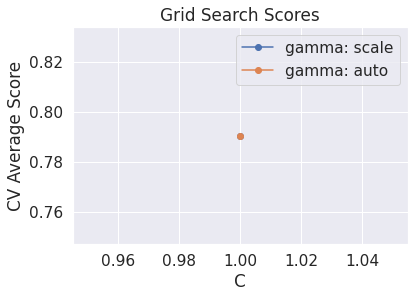

In [259]:
#SVC
select_cv = hyper_tuning['grid_cv object'][0]

plot_grid_search(select_cv.cv_results_, model_grid[0]['C'], model_grid[0]['gamma'], 'C', 'gamma')

# Model Choice

0.8413255956017105
[[ 530  275   48]
 [ 100 1178  996]
 [  12  647 9310]]
-8129


Text(0.5, 1.0, 'Support Vector Classifier (RBF kernel)')

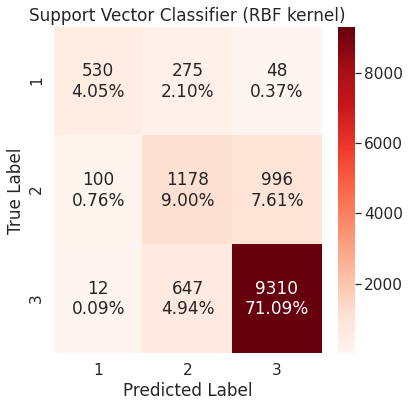

In [263]:
#SVC
select_cv = hyper_tuning['grid_cv object'][0]

test_score = select_cv.score(X_test_scaled, y_test)

y_pred = select_cv.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cost = my_cost_function(y_test, y_pred)

print(test_score)
print(cm)
print(cost)
_ = plot_multiclass_confusion_matrix(y_test, y_pred,[1,2,3])
plt.title('Support Vector Classifier (RBF kernel)')

0.8333842394624312
[[ 539  283   31]
 [ 108 1062 1104]
 [  16  640 9313]]
-8246


Text(0.5, 1.0, 'Random Forest')

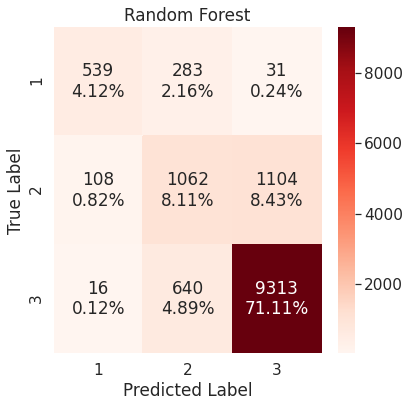

In [262]:
# Random Forest
select_cv = hyper_tuning['grid_cv object'][1]

test_score = select_cv.score(X_test_scaled, y_test)

y_pred = select_cv.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cost = my_cost_function(y_test, y_pred)

print(test_score)
print(cm)
print(cost)
_ = plot_multiclass_confusion_matrix(y_test, y_pred,[1,2,3])
plt.title('Random Forest')

The Support Vector Classifier has both a higher accuracy and a lower cost due to misclassification

Unit number : 76


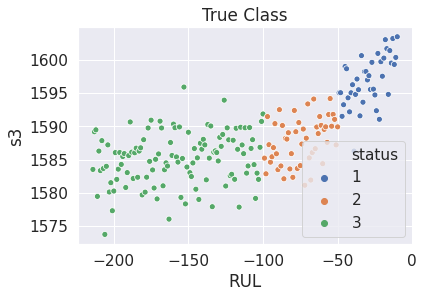

In [355]:
import random
#let's see it in action
# pick one engine trace from the test dataset
test_df = pd.read_csv('../data/test_op_regime2_FD001.csv')
random_unit = random.choice(test_df['unit_number'].unique())
print('Unit number : '+ str(random_unit)) #76 is a good example
test_df = test_df[test_df['unit_number']==random_unit]

#setting an arbitary boundary at 50 and 100 cycles for the binning\
first_boundary = -100
second_boundary = -50
test_df['status'] = pd.cut(test_df['RUL'],[-np.inf,first_boundary,second_boundary,0],labels=[3,2,1])

_ = sns.scatterplot('RUL','s3',data = test_df, hue='status')
_ = plt.title('True Class')
plt.savefig('../figures/SIMULATION_true_class.png')

In [356]:
cols_to_drop = ['dataset','unit_number', 
        'op_setting_1', 'op_setting_2', 'op_setting_3',
        's1', 's5', 's6', 's10', 's16', 's18', 's19',
        'op_regime','RUL']
predictor_col = ['status']

X_test = test_df.drop(cols_to_drop + predictor_col, axis=1).to_numpy()
X_test_scaled=scaler.transform(X_test)
y_pred = select_cv.predict(X_test_scaled)
test_df['pred_status']=y_pred

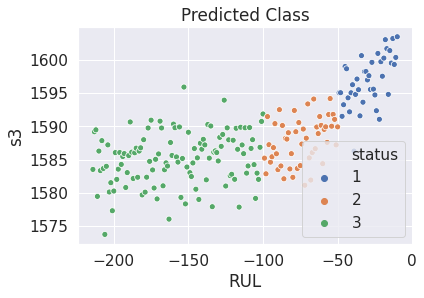

In [357]:
_ = sns.scatterplot('RUL','s3',data = test_df, hue='status')
_ = plt.title('Predicted Class')
plt.savefig('../figures/SIMULATION_predicted_class.png')

In [358]:
test_df['correct'] = test_df['pred_status'] == test_df['status']

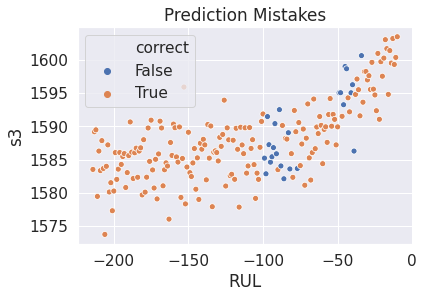

In [359]:
_ = sns.scatterplot('RUL','s3',data = test_df, hue='correct')
_ = plt.title('Prediction Mistakes')
plt.savefig('../figures/SIMULATION_classification_error.png')

## Extra: Bayesian Optiomization


In [283]:
# from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer

In [200]:
# # define search space
# params = {'C': Real(1e-6, 1e+6, prior='log-uniform'),
#           'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
#           'degree': Integer(1,8),
#           'kernel': Categorical(['linear', 'rbf']),
#          }

# # define the search

# search = BayesSearchCV(estimator=SVC(),
#                        search_spaces=params,
#                        n_jobs=-1,
#                        n_iter=10,
#                        random_state=0,
#                        cv=5,
#                        verbose=1)

# # perform the bayesian optimization
# print("Start Time : "+ str(datetime.now()))
# search.fit(X_train_scaled, y_train)
# print("End Time : "+ str(datetime.now()))

# # model can be saved, used for predictions or scoring
# print(opt.score(X_test, y_test))
# # report the best result
# print(search.best_score_)
# print(search.best_params_)

Start Time : 2020-10-06 10:55:12.099320
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 39.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   51.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 176.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


End Time : 2020-10-06 14:39:05.518821


NameError: name 'opt' is not defined

In [202]:
# # model can be saved, used for predictions or scoring
# print(search.score(X_test_scaled, y_test))
# # report the best result
# print(search.best_score_)
# print(search.best_params_)

0.8411728772144166
0.7903155445688527
OrderedDict([('C', 11428.693628355693), ('degree', 8), ('gamma', 0.13609648966949792), ('kernel', 'poly')])


```
Test Score = 0.8411728772144166
CV Score = 0.7903155445688527
OrderedDict([('C', 11428.693628355693), ('degree', 8), ('gamma', 0.13609648966949792), ('kernel', 'poly')])
```